In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
json_path = "/content/drive/MyDrive/VR Project 2/Data Curation/VQA Data/final_VQA_dict_merged_1234_2.json"
with open(json_path, 'r') as f:
    data = json.load(f)

In [5]:
question_counter = Counter()
correct_answers = defaultdict(Counter)
categories = Counter()
colors = Counter()


In [6]:
records = []
for product_id, qa_dict in data.items():
    for question, answer_info in qa_dict.items():
        if question == 'path':
            continue

        correct = answer_info.get('correct_option') or answer_info.get('correct')
        if correct is None and 'options' in answer_info:
            correct = answer_info['options'][0]  # fallback

        question_counter[question] += 1
        correct_answers[question][correct] += 1

        if "category" in question.lower():
            categories[correct] += 1
        if "color" in question.lower():
            colors[correct] += 1

        records.append({
            "product_id": product_id,
            "question": question,
            "correct_answer": correct
        })

In [7]:
df = pd.DataFrame(records)


In [8]:
def plot_top_counter(counter, title, xlabel):
    top_items = counter.most_common(10)
    if not top_items:
        return
    items, counts = zip(*top_items)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(items), orient='h')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Items")
    plt.tight_layout()
    plt.show()


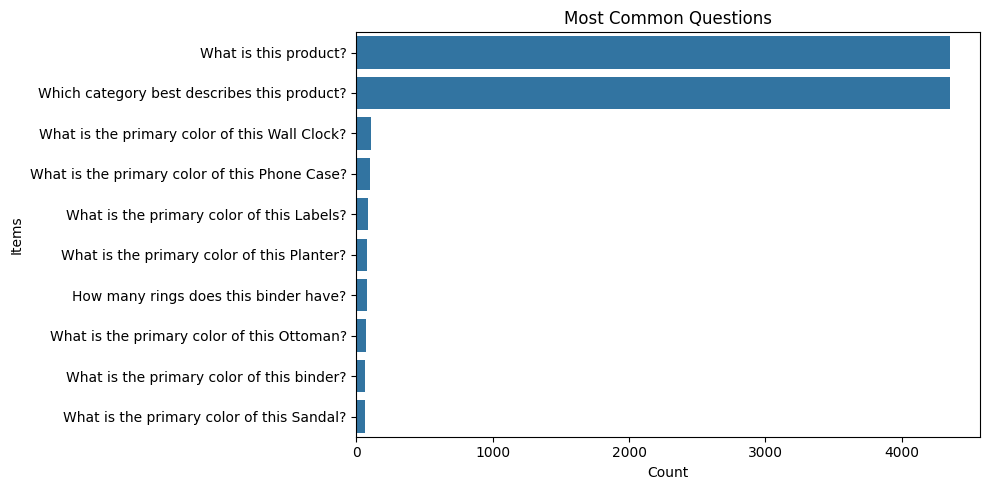

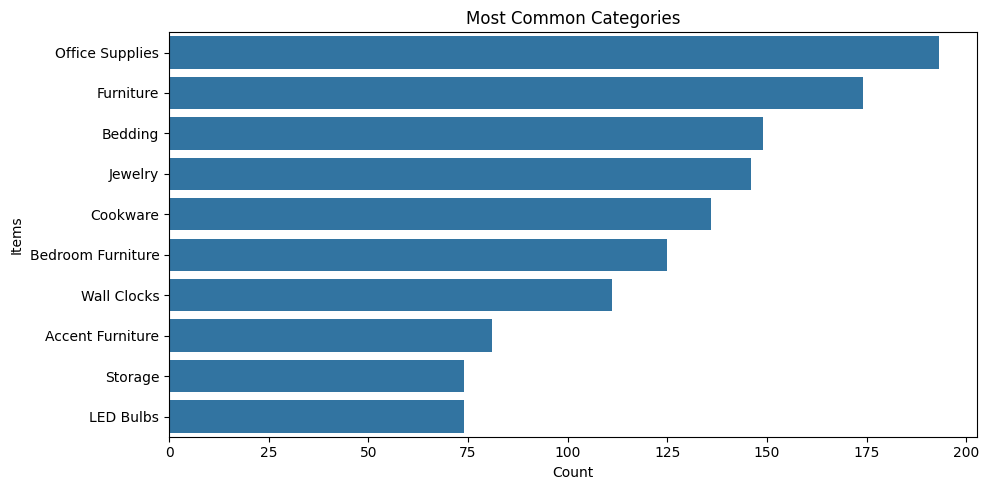

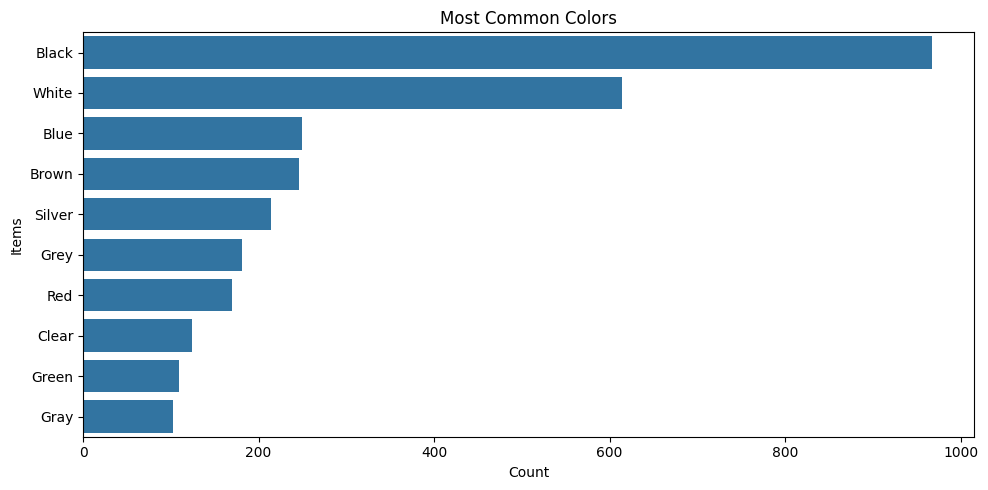

In [9]:
plot_top_counter(question_counter, "Most Common Questions", "Count")
plot_top_counter(categories, "Most Common Categories", "Count")
plot_top_counter(colors, "Most Common Colors", "Count")


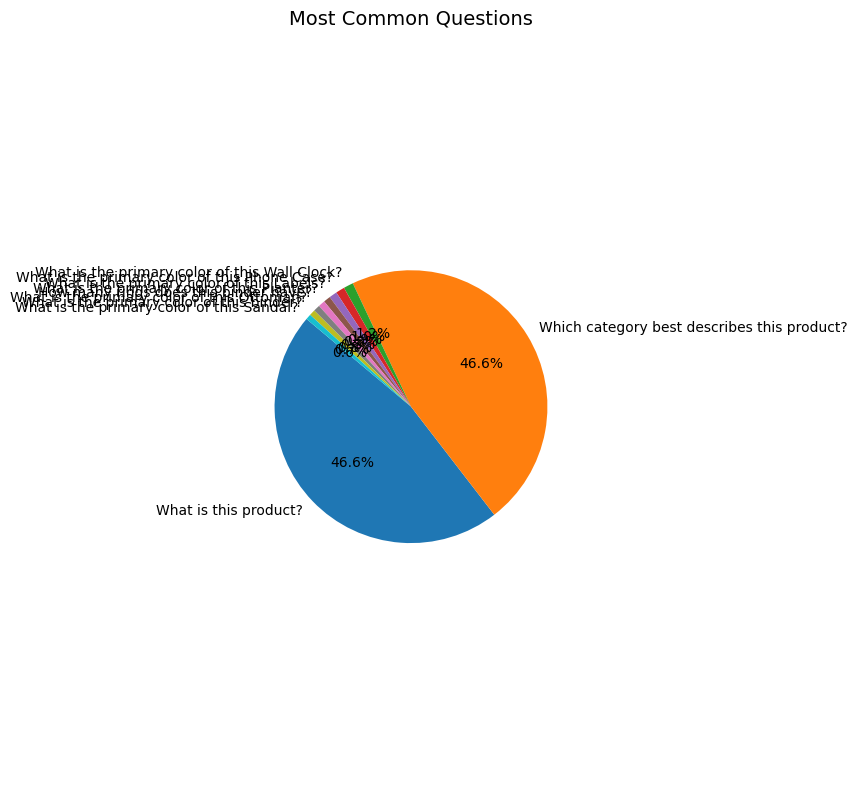

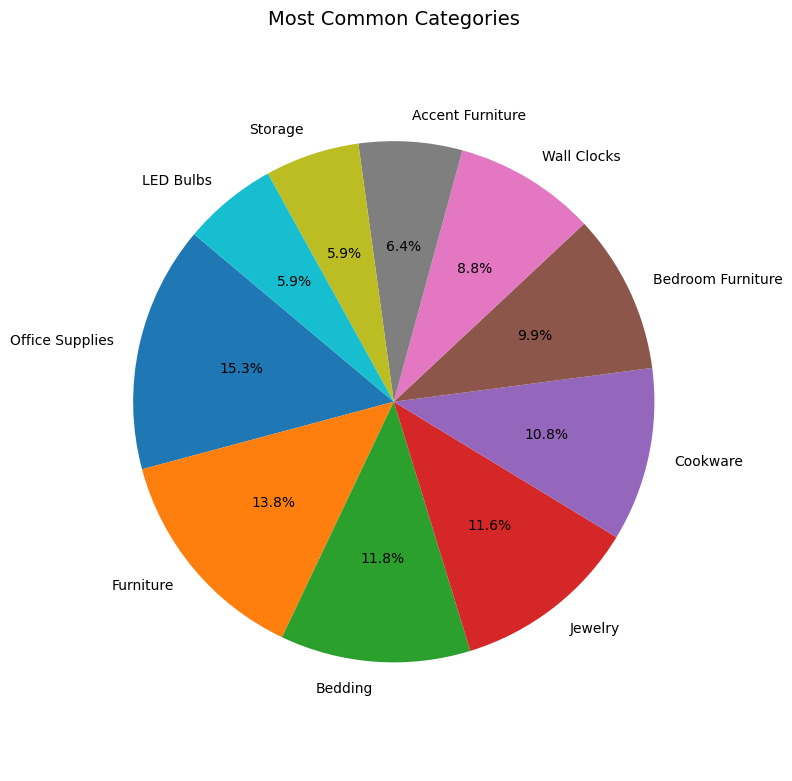

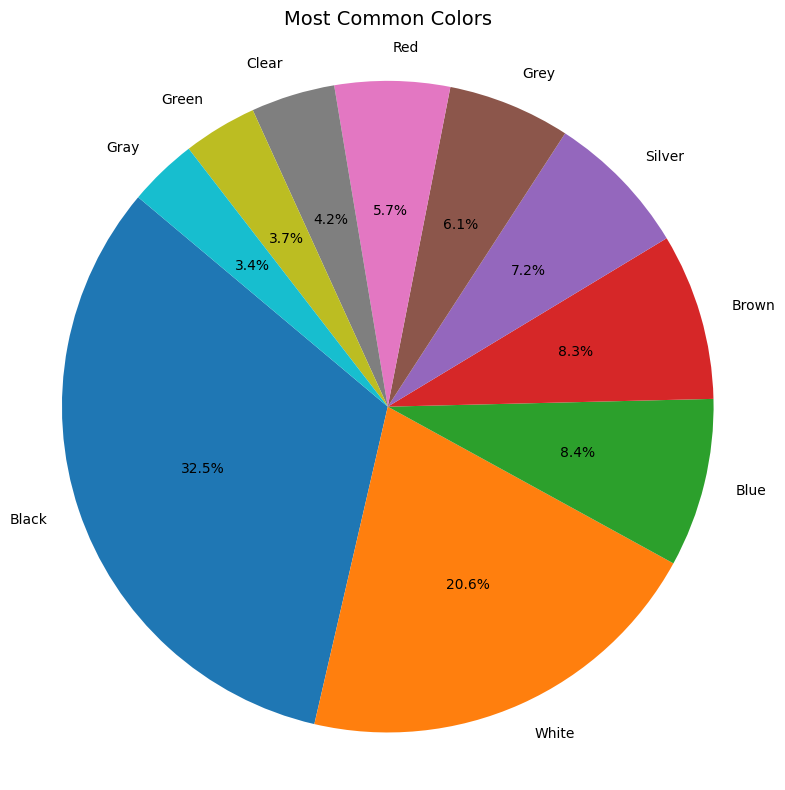

In [14]:
import matplotlib.pyplot as plt

def plot_top_counter_pie(counter, title):
    top_items = counter.most_common(10)
    if not top_items:
        return
    labels, sizes = zip(*top_items)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
    plt.title(title, fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

# Call the updated function for your counters
plot_top_counter_pie(question_counter, "Most Common Questions")
plot_top_counter_pie(categories, "Most Common Categories")
plot_top_counter_pie(colors, "Most Common Colors")


In [10]:
# Print top answers per question type (preview)
for question, answer_counts in list(correct_answers.items())[:5]:
    print(f"\nTop answers for question: '{question}'")
    for ans, count in answer_counts.most_common(5):
        print(f"  {ans}: {count}")



Top answers for question: 'What is this product?'
  Wall Clock: 108
  Ottoman: 104
  Phone Case: 98
  Labels: 96
  Planter: 91

Top answers for question: 'Which category best describes this product?'
  Office Supplies: 193
  Furniture: 174
  Bedding: 149
  Jewelry: 145
  Cookware: 136

Top answers for question: 'What is the primary color of this TV Mount?'
  Black: 43

Top answers for question: 'How many arms does this TV mount have?'
  Two: 5
  Three: 5
  Four: 3
  Dual-Arm: 1
  Triple: 1

Top answers for question: 'Does this TV mount include an HDMI cable?'
  Yes: 1


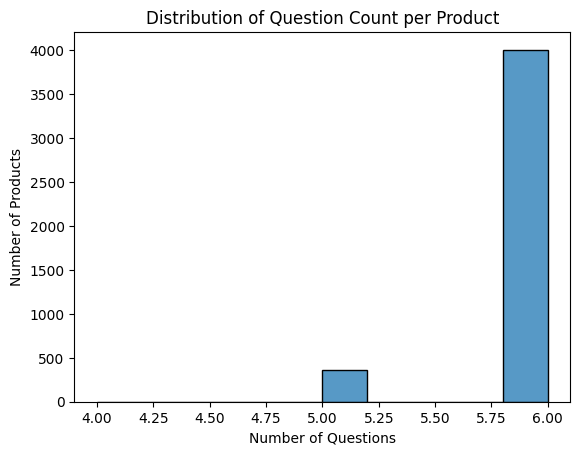

In [11]:
product_question_counts = df.groupby("product_id")["question"].count()
sns.histplot(product_question_counts, bins=10)
plt.title("Distribution of Question Count per Product")
plt.xlabel("Number of Questions")
plt.ylabel("Number of Products")
plt.show()


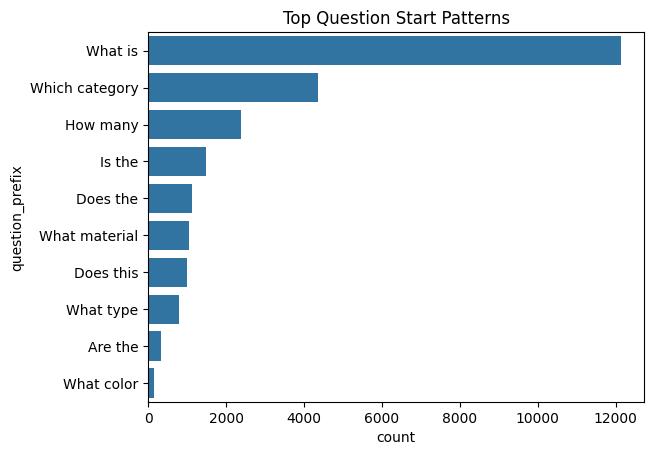

In [12]:
df['question_prefix'] = df['question'].str.split().str[:2].str.join(' ')
sns.countplot(y=df['question_prefix'], order=df['question_prefix'].value_counts().iloc[:10].index)
plt.title("Top Question Start Patterns")
plt.show()


In [13]:
# answer_diversity = {q: len(set(ans_counter)) for q, ans_counter in correct_answers.items()}
# diversity_df = pd.DataFrame.from_dict(answer_diversity, orient='index', columns=["Unique Answers"])
# diversity_df.sort_values("Unique Answers", ascending=False).plot(kind='barh', figsize=(8, 10), title="Answer Diversity per Question")
# plt.tight_layout()
# plt.show()


<ipython-input-13-ee218d39bf2d>:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-ee218d39bf2d>", line 5, in <cell line: 0>
    plt.show()
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py", line 614, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
           ^^^^^^^^^^^^^^
  File "<decorator-gen-

TypeError: object of type 'NoneType' has no len()

In [15]:
inconsistent_color = df[df["question"].str.contains("color", case=False)]
color_inconsistency = inconsistent_color.groupby("product_id")["correct_answer"].nunique()
print("Products with multiple color labels:", (color_inconsistency > 1).sum())


Products with multiple color labels: 291


In [1]:
# # First extract main category from category-related question
# category_df = df[df["question"].str.contains("category", case=False)]
# merged = df.merge(category_df[['product_id', 'correct_answer']], on='product_id', suffixes=('', '_category'))
# grouped = merged.groupby(['correct_answer_category', 'question']).size().unstack().fillna(0)
# grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
# plt.title("Question Distribution by Product Category")
# plt.ylabel("Count")
# plt.tight_layout()
# plt.show()


In [3]:
# paths = [qa.get("path") for qa in data.values()]
# missing_paths = [pid for pid, qa in data.items() if "path" not in qa]
# print(f"Missing image paths: {len(missing_paths)}")
